         date      city  temperature_celsius  humidity_percent  \
0  2023-01-01  New York             5.000000              60.0   
1  2023-01-02  New York             8.923529              65.0   
2  2023-03-01  New York             7.000000               NaN   
4  2023-01-02    London             6.000000              75.0   
5  2023-01-03    London             9.912500              80.0   
6  2023-01-01     Tokyo            10.000000              50.0   
7  2023-01-02     Tokyo            12.000000              55.0   
9  2023-01-25  New York             8.923529              51.0   
12 2023-01-07  New York             8.923529               NaN   
14 2023-01-15    London             9.912500              56.0   
16 2023-01-12     Tokyo             7.164706              61.0   
20 2023-01-25     Tokyo             6.200000               NaN   
21 2023-01-17     Tokyo            19.300000              43.0   
23 2023-01-05    London             9.912500              60.0   
27 2023-01

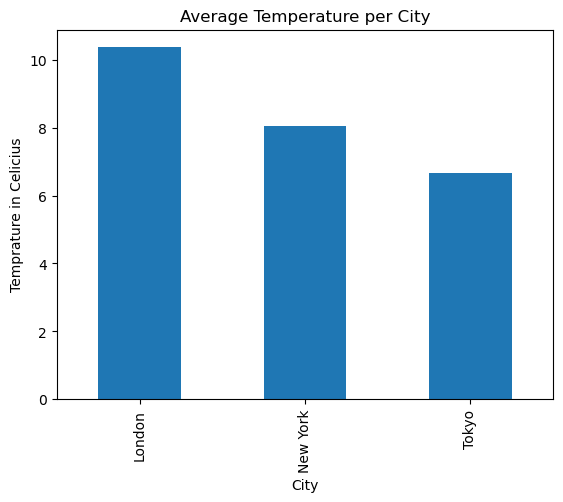

New York: 2.75 °C
Tokyo: 8.47 °C
London: 12.05 °C
top_5_cities_temperature_report.txt


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('weather_data.csv')

#Replace missing temperature_celsius values with the average temperature for that city
df['temperature_celsius'] = df.groupby('city')['temperature_celsius'].transform(lambda x: x.fillna(x.mean()))

# Drop rows with missing values of date column
df = df.dropna(subset=['date'])

#convert date column into YYYY-MM-DD format
df['date'] = pd.to_datetime(df['date'], format='mixed')

#converting temperature_celsius to temperature_fahrenheit and store it in new column
df['temperature_fahrenheit'] = df['temperature_celsius'] * 9/5 + 32

# Drop rows where 'Weather' is null
df = df.dropna(subset=['weather_condition'])

# Drop rows where 'Weather' is 'Unknown'
df_cleaned = df[df['weather_condition'] != 'Unknown']

#print the first rows for instance
print(df_cleaned)

#grouping city using average of temprature
grouped_data = df.groupby('city')['temperature_celsius'].mean()

#plot bar chart of average temperature per city using Matplotlib
grouped_data.plot(kind = 'bar', x = 'city', y = 'temperature_celsius')
plt.title('Average Temperature per City')
plt.xlabel('City')
plt.ylabel('Temprature in Celicius')
plt.show()

#save cleaned data as tranformed_weather_data.csv
df_cleaned.to_csv('tranformed_weather_data.csv')

# Calculate average temperature per city
avg_temp_per_city = df_cleaned.groupby('city')['temperature_celsius'].mean()

# Generate the text report
report_lines = ["Top 5 Cities with Highest Average Temperature (°C):\n"]
for city, temp in top_5_cities.items():
    report_lines.append(f"{city}: {temp:.2f} °C")
    print(f"{city}: {temp:.2f} °C")

# Write to TXT file
with open('top_5_cities_temperature_report.txt', 'w') as f:
    f.write('\n'.join(report_lines))

print("top_5_cities_temperature_report.txt")